
# CAR PRICE PREDICTION


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
df['Car_Name'].head(15)

0              ritz
1               sx4
2              ciaz
3           wagon r
4             swift
5     vitara brezza
6              ciaz
7           s cross
8              ciaz
9              ciaz
10         alto 800
11             ciaz
12             ciaz
13           ertiga
14            dzire
Name: Car_Name, dtype: object

In [7]:
corrletion = df.corr()
corrletion["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [8]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [11]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [12]:
df.drop("Car_Name",axis=1,inplace=True)

In [13]:
# x.head()
# y.head()

In [14]:
x = df.drop("Selling_Price",axis=1)

In [15]:
y = df["Selling_Price"] 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# Model = LinearRegression()
Model = RandomForestRegressor()

In [18]:
Model.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
pred = Model.predict(x_train)

In [20]:
type(pred)

numpy.ndarray

In [21]:
error = metrics.r2_score(y_train,pred)

In [22]:
error

0.9816054653884373

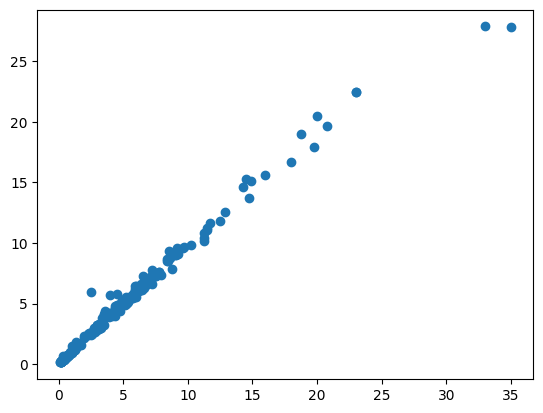

In [23]:
# plt.plot(y_train,pred)
plt.scatter(y_train,pred)

In [24]:
new = pd.DataFrame(pred)

In [25]:
new.head(10)

,0
0,0.2417
1,0.7833
2,0.2909
3,4.1090
4,1.1460
5,20.5240
6,22.4993
7,6.5545
8,0.3667
9,3.3140


In [26]:
y_train.head(10)

184     0.25
132     0.75
194     0.20
75      3.95
111     1.15
59     19.99
93     23.00
6       6.75
175     0.38
30      3.10
Name: Selling_Price, dtype: float64

In [27]:
Model.predict(x_test)

array([ 0.4367, 11.0213,  4.9455,  0.1989,  7.4058,  6.1675,  1.0928,
        0.5658,  0.4729,  6.5645,  7.9002,  1.0837,  8.0279,  0.4716,
        5.366 ,  2.5945,  1.1145, 14.3254,  0.4767,  1.5805,  0.3593,
        8.054 ,  4.645 ,  2.7665,  0.5019,  3.5125,  5.283 ,  3.103 ,
        1.1932,  1.1724,  0.4548,  9.8165,  0.4595,  2.6185,  7.634 ,
        4.192 ,  6.0235,  6.4616,  2.547 ,  6.9219,  4.3197,  3.4719,
        4.8755,  0.542 ,  6.1195,  0.7186,  7.9135,  7.0405,  2.8545,
        3.513 ,  4.953 ,  1.5266, 22.042 , 20.2846,  6.205 , 10.1039,
        5.0335,  8.9957,  2.7185,  6.8298,  0.2337])

In [28]:
y_test.head(15)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
9       7.45
118     1.10
154     0.50
164     0.45
33      6.00
5       9.25
116     1.10
45      7.50
173     0.40
230     6.15
Name: Selling_Price, dtype: float64

In [29]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,2008,0.750,26000,0,1,0,1
132,2017,0.950,3500,0,1,0,0
194,2008,0.787,50000,0,1,0,0
75,2015,6.800,36000,0,0,0,0
111,2016,1.500,8700,0,1,0,0
...,...,...,...,...,...,...,...
188,2013,0.570,18000,0,1,0,0
71,2011,12.480,45000,1,0,0,0
106,2014,3.450,16500,0,1,0,1
270,2011,10.000,69341,0,0,0,0


In [30]:
test = [[2013,3.35,28000,0,0,0,0]]

In [31]:
type(x_train)

pandas.core.frame.DataFrame

In [32]:
test = pd.DataFrame(test)

In [33]:
Model.predict(test)

C:\Users\govind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.963])